 **Airlines Ticket Price Prediction using Machine Learning Approach**


 
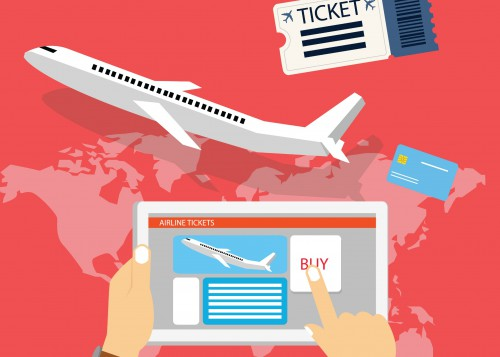

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [ ]:
Air_data = pd.read_csv(r'/content/drive/MyDrive/CSV Files/copy.csv')

In [ ]:
Air_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,01/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,5:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,9:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
Air_data.shape

(10000, 11)

In [ ]:
Air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10000 non-null  object
 1   Date_of_Journey  10000 non-null  object
 2   Source           10000 non-null  object
 3   Destination      10000 non-null  object
 4   Route            9999 non-null   object
 5   Dep_Time         10000 non-null  object
 6   Arrival_Time     10000 non-null  object
 7   Duration         10000 non-null  object
 8   Total_Stops      9999 non-null   object
 9   Additional_Info  10000 non-null  object
 10  Price            10000 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 859.5+ KB


#check nulls

In [ ]:
Air_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
Air_data['Total_Stops'].mode()

0    1 stop
dtype: object

#fill null in total stops by mode

In [ ]:
Air_data['Total_Stops'] = Air_data['Total_Stops'].fillna('1 stop')

In [ ]:
Air_data['Total_Stops'].isnull().sum()

0

In [ ]:
Air_data.dropna(inplace=True)

In [ ]:
Air_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

#show decribe for object features types

In [ ]:
Air_data.describe(include='O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999
unique,12,40,5,6,128,220,1301,364,5,9
top,Jet Airways,06/06/2019,Delhi,Cochin,DEL → BOM → COK,17:00,19:00,2h 50m,1 stop,No info
freq,3598,475,4256,4256,2233,217,396,518,5280,7823


#show describe for numerical

In [ ]:
Air_data.describe()

,Price
count,9999.000000
mean,9087.764376
std,4591.600921
min,1759.000000
25%,5276.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
Air_data['Airline'].value_counts()

Jet Airways                          3598
IndiGo                               1927
Air India                            1633
Multiple carriers                    1128
SpiceJet                              769
Vistara                               447
Air Asia                              296
GoAir                                 179
Multiple carriers Premium economy      13
Jet Airways Business                    5
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

#check count of flights in every airline

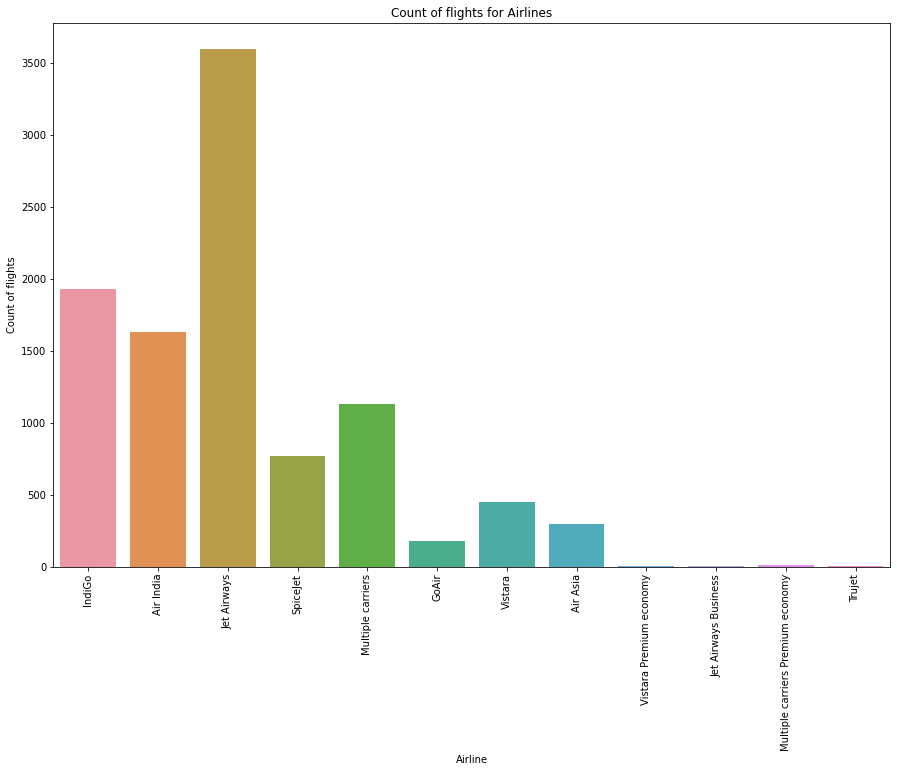

In [ ]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights for Airlines')
sns.countplot(x='Airline' , data=Air_data)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
plt.show()

#check price variation per each airline

Text(0, 0.5, 'Ticket Price')

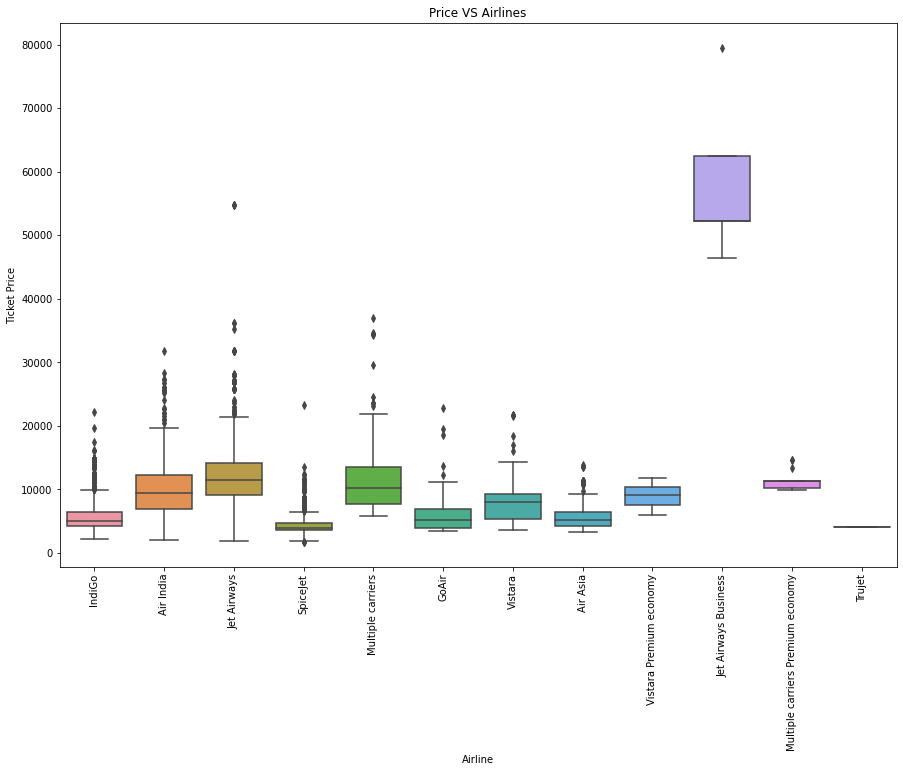

In [ ]:
plt.figure(figsize = (15, 10))
plt.title('Price VS Airlines')
sns.boxplot(x = Air_data['Airline'], y = Air_data['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Ticket Price')

In [ ]:
Air_data['Source'].value_counts()

Delhi       4256
Kolkata     2678
Banglore    2058
Mumbai       647
Chennai      360
Name: Source, dtype: int64

#check count of flights for every source

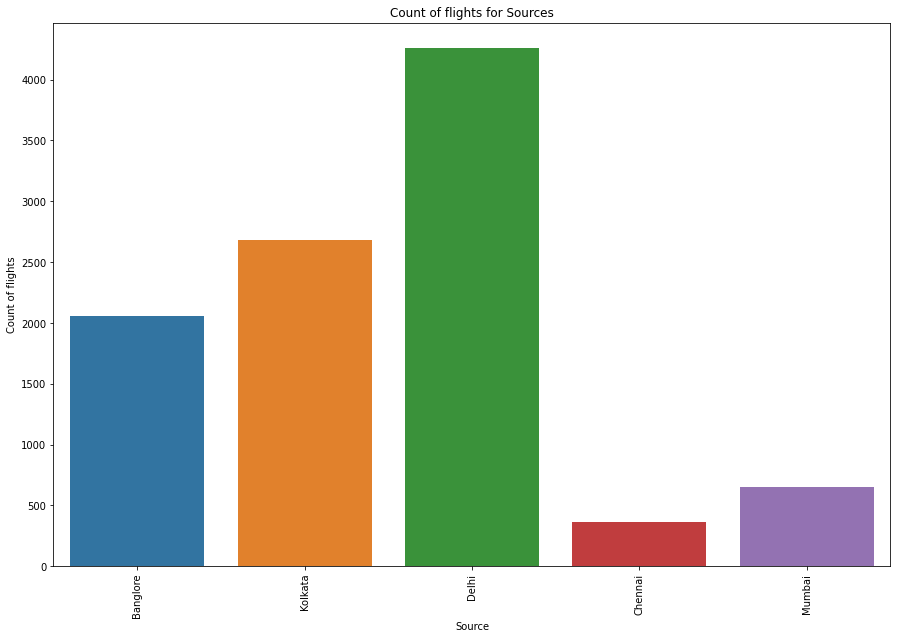

In [ ]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights for Sources')
sns.countplot(x='Source' , data=Air_data)
plt.xlabel('Source')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
Air_data['Destination'].value_counts()

Cochin       4256
Banglore     2678
Delhi        1191
New Delhi     867
Hyderabad     647
Kolkata       360
Name: Destination, dtype: int64

#check count of flights for every destination

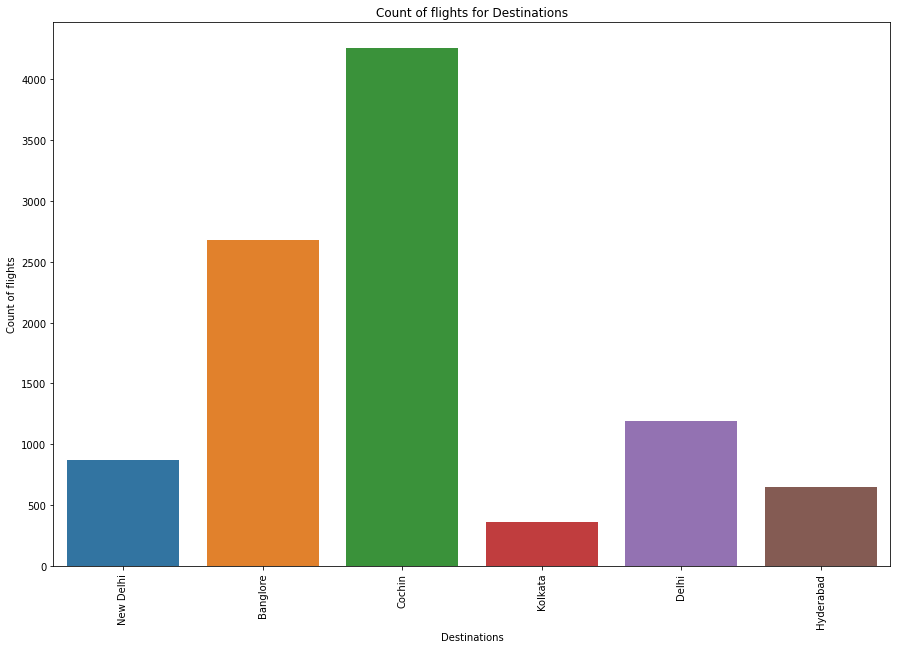

In [ ]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights for Destinations')
sns.countplot(x='Destination' , data=Air_data)
plt.xlabel('Destinations')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
Air_data['Total_Stops'].value_counts()

1 stop      5280
non-stop    3259
2 stops     1415
3 stops       44
4 stops        1
Name: Total_Stops, dtype: int64

#check price variation per each total stops number

Text(0, 0.5, 'Ticket Price')

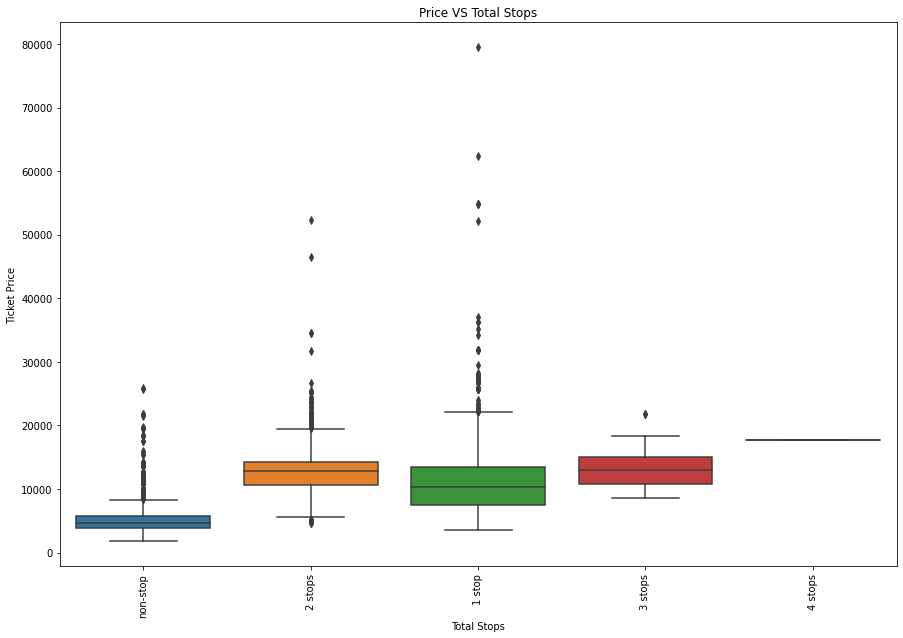

In [ ]:
plt.figure(figsize = (15, 10))
plt.title('Price VS Total Stops')
sns.boxplot(x = Air_data['Total_Stops'], y = Air_data['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Total Stops')
plt.ylabel('Ticket Price')

In [ ]:
Air_data['Additional_Info'].value_counts()

No info                         7823
In-flight meal not included     1844
No check-in baggage included     299
1 Long layover                    19
Change airports                    6
No Info                            3
Business class                     3
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [ ]:
Air_data['Additional_Info'] = Air_data['Additional_Info'].replace('No Info','No info')

#check data time range

In [ ]:
print(Air_data['Date_of_Journey'].min())
print(Air_data['Date_of_Journey'].max())

01/03/2019
27/06/2019


#split by / and took the index we want.
#split fn is not a series fn, so we write it as str.split

In [ ]:
Air_data['Day_of_Journey'] = Air_data['Date_of_Journey'].str.split('/').str[0].astype(int)
Air_data['Month_of_Journey'] = Air_data['Date_of_Journey'].str.split('/').str[1].astype(int)

In [ ]:
Air_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,01/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,5:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,9:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


#Now I want to convert duration to be in total minutes format
#There's many ways to do that, the easier is to convert to the shape of proper eqn then apply the function on dataframe to calculate it.

In [ ]:
def preprocess_duration(x):
  if 'h' not in x:
    x='0h'+x
  elif 'm' not in x:
      x=x+'0m'
  return x

In [ ]:
Air_data['Duration'].apply(preprocess_duration)

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
         ...   
9995     1h 30m
9996    10h 25m
9997    11h 45m
9998     2h 50m
9999     2h 50m
Name: Duration, Length: 9999, dtype: object

In [ ]:
Air_data['Duration']=Air_data['Duration'].apply(preprocess_duration)

In [ ]:
Air_data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
         ...   
9995     1h 30m
9996    10h 25m
9997    11h 45m
9998     2h 50m
9999     2h 50m
Name: Duration, Length: 9999, dtype: object

In [ ]:
Air_data['Duration'][0]

'2h 50m'

In [ ]:
Air_data['Duration'][0].split(' ')

['2h', '50m']

In [ ]:
Air_data['Duration'][0].split(' ')[0]

'2h'

In [ ]:
int(Air_data['Duration'][0].split(' ')[0][0:-1])

2

In [ ]:
Air_data['Duration'][0].split(' ')[1]

'50m'

In [ ]:
int(Air_data['Duration'][0].split(' ')[1][0:-1])

50

In [ ]:
Air_data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))

0        2
1        7
2       19
3        5
4        4
        ..
9995     1
9996    10
9997    11
9998     2
9999     2
Name: Duration, Length: 9999, dtype: int64

In [ ]:
Air_data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

0       50
1       25
2        0
3       25
4       45
        ..
9995    30
9996    25
9997    45
9998    50
9999    50
Name: Duration, Length: 9999, dtype: int64

In [ ]:
Air_data['Duration_mins']=Air_data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))

In [ ]:
Air_data['Duration_mins']=Air_data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

In [ ]:
Air_data['Duration_in_min'] = Air_data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [ ]:
Air_data['Duration_in_min']

0        170
1        445
2       1140
3        325
4        285
        ... 
9995      90
9996     625
9997     705
9998     170
9999     170
Name: Duration_in_min, Length: 9999, dtype: int64

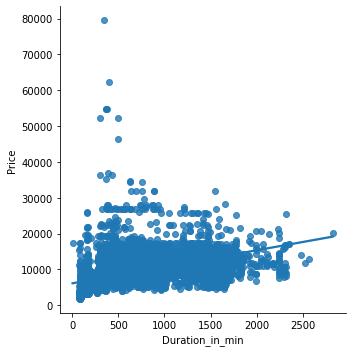

In [ ]:
sns.lmplot(x='Duration_in_min', y='Price', data=Air_data)

In [ ]:
Air_data['Arrival_Time'].value_counts()

19:00           396
21:00           344
19:15           309
16:10           143
12:35           115
               ... 
02:15 16 May      1
10:40 22 May      1
20:45 19 May      1
01:20 25 Jun      1
01:00 25 Apr      1
Name: Arrival_Time, Length: 1301, dtype: int64

In [ ]:
Air_data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Duration_mins,Duration_in_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,50,170
1,Air India,01/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,5:50,13:15,7h 25m,2 stops,No info,7662,1,5,25,445
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,9:25,04:25 10 Jun,19h 0m,2 stops,No info,13882,9,6,0,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,25,325
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,45,285


In [ ]:
Air_data['Duration'].unique()

array(['2h 50m', '7h 25m', '19h 0m', '5h 25m', '4h 45m', '2h 25m',
       '15h 30m', '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m',
       '2h 15m', '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h 0m',
       '20h 35m', '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m',
       '5h 45m', '5h 55m', '13h 25m', '22h 0m', '5h 30m', '10h 25m',
       '5h 15m', '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m',
       '22h 5m', '2h 45m', '12h 0m', '16h 5m', '19h 55m', '3h 15m',
       '25h 20m', '3h 0m', '16h 15m', '15h 5m', '6h 30m', '25h 5m',
       '12h 25m', '27h 20m', '10h 15m', '10h 30m', '1h 30m', '1h 25m',
       '26h 30m', '7h 20m', '13h 30m', '5h 0m', '19h 5m', '14h 50m',
       '2h 40m', '22h 10m', '9h 35m', '10h 0m', '21h 20m', '18h 45m',
       '12h 20m', '18h 0m', '9h 15m', '17h 30m', '16h 35m', '12h 15m',
       '7h 30m', '24h 0m', '8h 55m', '7h 10m', '14h 30m', '30h 20m',
       '15h 0m', '12h 45m', '10h 10m', '15h 25m', '14h 5m', '20h 15m',
       '23h 10m', '18h 10m',

In [ ]:
Air_data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [ ]:
Air_data['Destination'].value_counts()

Cochin       4256
Banglore     2678
Delhi        1191
New Delhi     867
Hyderabad     647
Kolkata       360
Name: Destination, dtype: int64

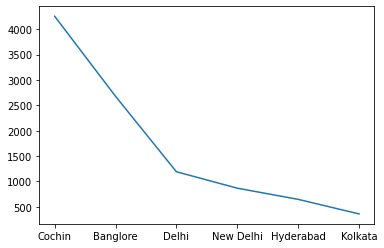

In [ ]:
Air_data['Destination'].value_counts().plot()

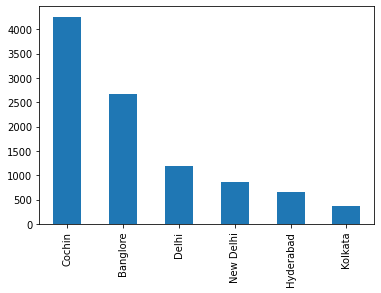

In [ ]:
Air_data['Destination'].value_counts().plot(kind='bar')

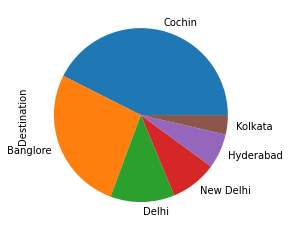

In [ ]:
Air_data['Destination'].value_counts().plot(kind='pie')

In [ ]:
Air_data['Route']

0                   BLR → DEL
1       CCU → IXR → BBI → BLR
2       DEL → LKO → BOM → COK
3             CCU → NAG → BLR
4             BLR → NAG → DEL
                ...          
9995                BOM → HYD
9996    DEL → IDR → BOM → COK
9997          CCU → BOM → BLR
9998                BLR → DEL
9999                BLR → DEL
Name: Route, Length: 9999, dtype: object

In [ ]:
Air_data['Airline']

0                  IndiGo
1               Air India
2             Jet Airways
3                  IndiGo
4                  IndiGo
              ...        
9995             SpiceJet
9996    Multiple carriers
9997          Jet Airways
9998            Air India
9999               IndiGo
Name: Airline, Length: 9999, dtype: object

#way is to convert data to datetime then extract whatever we want

In [ ]:
Air_data['Dep_hour'] = pd.to_datetime(Air_data['Dep_Time']).dt.hour
Air_data['Dep_min'] = pd.to_datetime(Air_data['Dep_Time']).dt.minute

Air_data['Arrival_hour'] = pd.to_datetime(Air_data['Arrival_Time']).dt.hour
Air_data['Arrival_min'] = pd.to_datetime(Air_data['Arrival_Time']).dt.minute

In [ ]:
Air_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Duration_mins,Duration_in_min,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,50,170,22,20,1,10
1,Air India,01/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,5:50,13:15,7h 25m,2 stops,No info,7662,1,5,25,445,5,50,13,15
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,9:25,04:25 10 Jun,19h 0m,2 stops,No info,13882,9,6,0,1140,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,25,325,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,45,285,16,50,21,35


#Now I'll drop the un-needed replicated columns

In [ ]:
Air_data.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Duration'] , axis=1, inplace=True)

In [ ]:
Air_data.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Duration_mins,Duration_in_min,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,50,170,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,25,445,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,0,1140,9,25,4,25


In [ ]:
Air_data.dtypes

Airline             object
Source              object
Destination         object
Route               object
Total_Stops         object
Additional_Info     object
Price                int64
Day_of_Journey       int64
Month_of_Journey     int64
Duration_mins        int64
Duration_in_min      int64
Dep_hour             int64
Dep_min              int64
Arrival_hour         int64
Arrival_min          int64
dtype: object

#Map total stops values

In [ ]:
Air_data['Total_Stops'] = Air_data['Total_Stops'].map({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}).astype(int)

In [ ]:
Air_data.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Duration_mins,Duration_in_min,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,50,170,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,25,445,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,0,1140,9,25,4,25


In [ ]:
Air_data.corr()

,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Duration_mins,Duration_in_min,Dep_hour,Dep_min,Arrival_hour,Arrival_min
Total_Stops,1.000000,0.605052,-0.003814,0.048818,-0.137724,0.737977,-0.057108,-0.004444,0.039837,-0.106658
Price,0.605052,1.000000,-0.151349,-0.105704,-0.128466,0.509631,0.011162,-0.026176,0.025227,-0.083919
Day_of_Journey,-0.003814,-0.151349,1.000000,-0.036576,-0.008075,-0.018530,-0.002508,-0.007231,-0.001373,-0.020010
Month_of_Journey,0.048818,-0.105704,-0.036576,1.000000,-0.039919,0.009539,0.041866,-0.061346,-0.007544,-0.099787
Duration_mins,-0.137724,-0.128466,-0.008075,-0.039919,1.000000,-0.095742,-0.025465,0.093081,-0.121411,0.151223
Duration_in_min,0.737977,0.509631,-0.018530,0.009539,-0.095742,1.000000,0.002725,-0.021491,0.049585,-0.066709
Dep_hour,-0.057108,0.011162,-0.002508,0.041866,-0.025465,0.002725,1.000000,-0.025710,0.002961,0.065696
Dep_min,-0.004444,-0.026176,-0.007231,-0.061346,0.093081,-0.021491,-0.025710,1.000000,0.036124,-0.015648
Arrival_hour,0.039837,0.025227,-0.001373,-0.007544,-0.121411,0.049585,0.002961,0.036124,1.000000,-0.152907
Arrival_min,-0.106658,-0.083919,-0.020010,-0.099787,0.151223,-0.066709,0.065696,-0.015648,-0.152907,1.000000


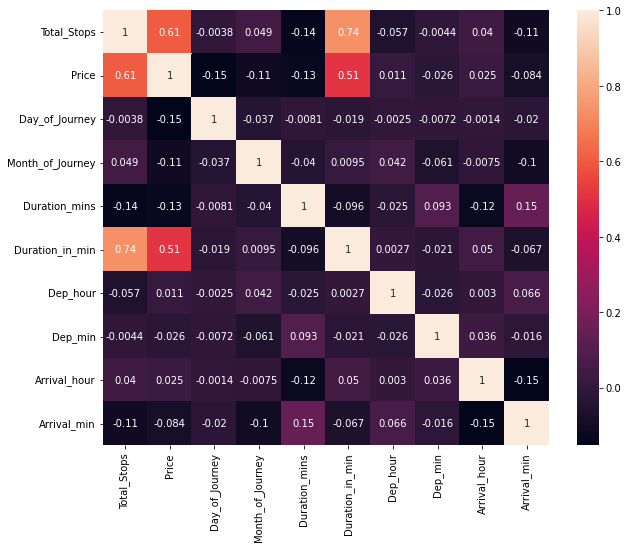

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(Air_data.corr() , annot=True)

In [ ]:
feature_corr = round(Air_data.corr().unstack().sort_values() ,3)
feature_corr

Arrival_hour      Arrival_min        -0.153
Arrival_min       Arrival_hour       -0.153
Day_of_Journey    Price              -0.151
Price             Day_of_Journey     -0.151
Duration_mins     Total_Stops        -0.138
                                      ...  
Month_of_Journey  Month_of_Journey    1.000
Day_of_Journey    Day_of_Journey      1.000
Price             Price               1.000
Arrival_hour      Arrival_hour        1.000
Arrival_min       Arrival_min         1.000
Length: 100, dtype: float64

In [ ]:
print( feature_corr[(abs(feature_corr) >0.5) & (abs(feature_corr) <1) ].drop_duplicates() )

Price            Duration_in_min    0.510
                 Total_Stops        0.605
Duration_in_min  Total_Stops        0.738
dtype: float64


<Figure size 432x288 with 0 Axes>

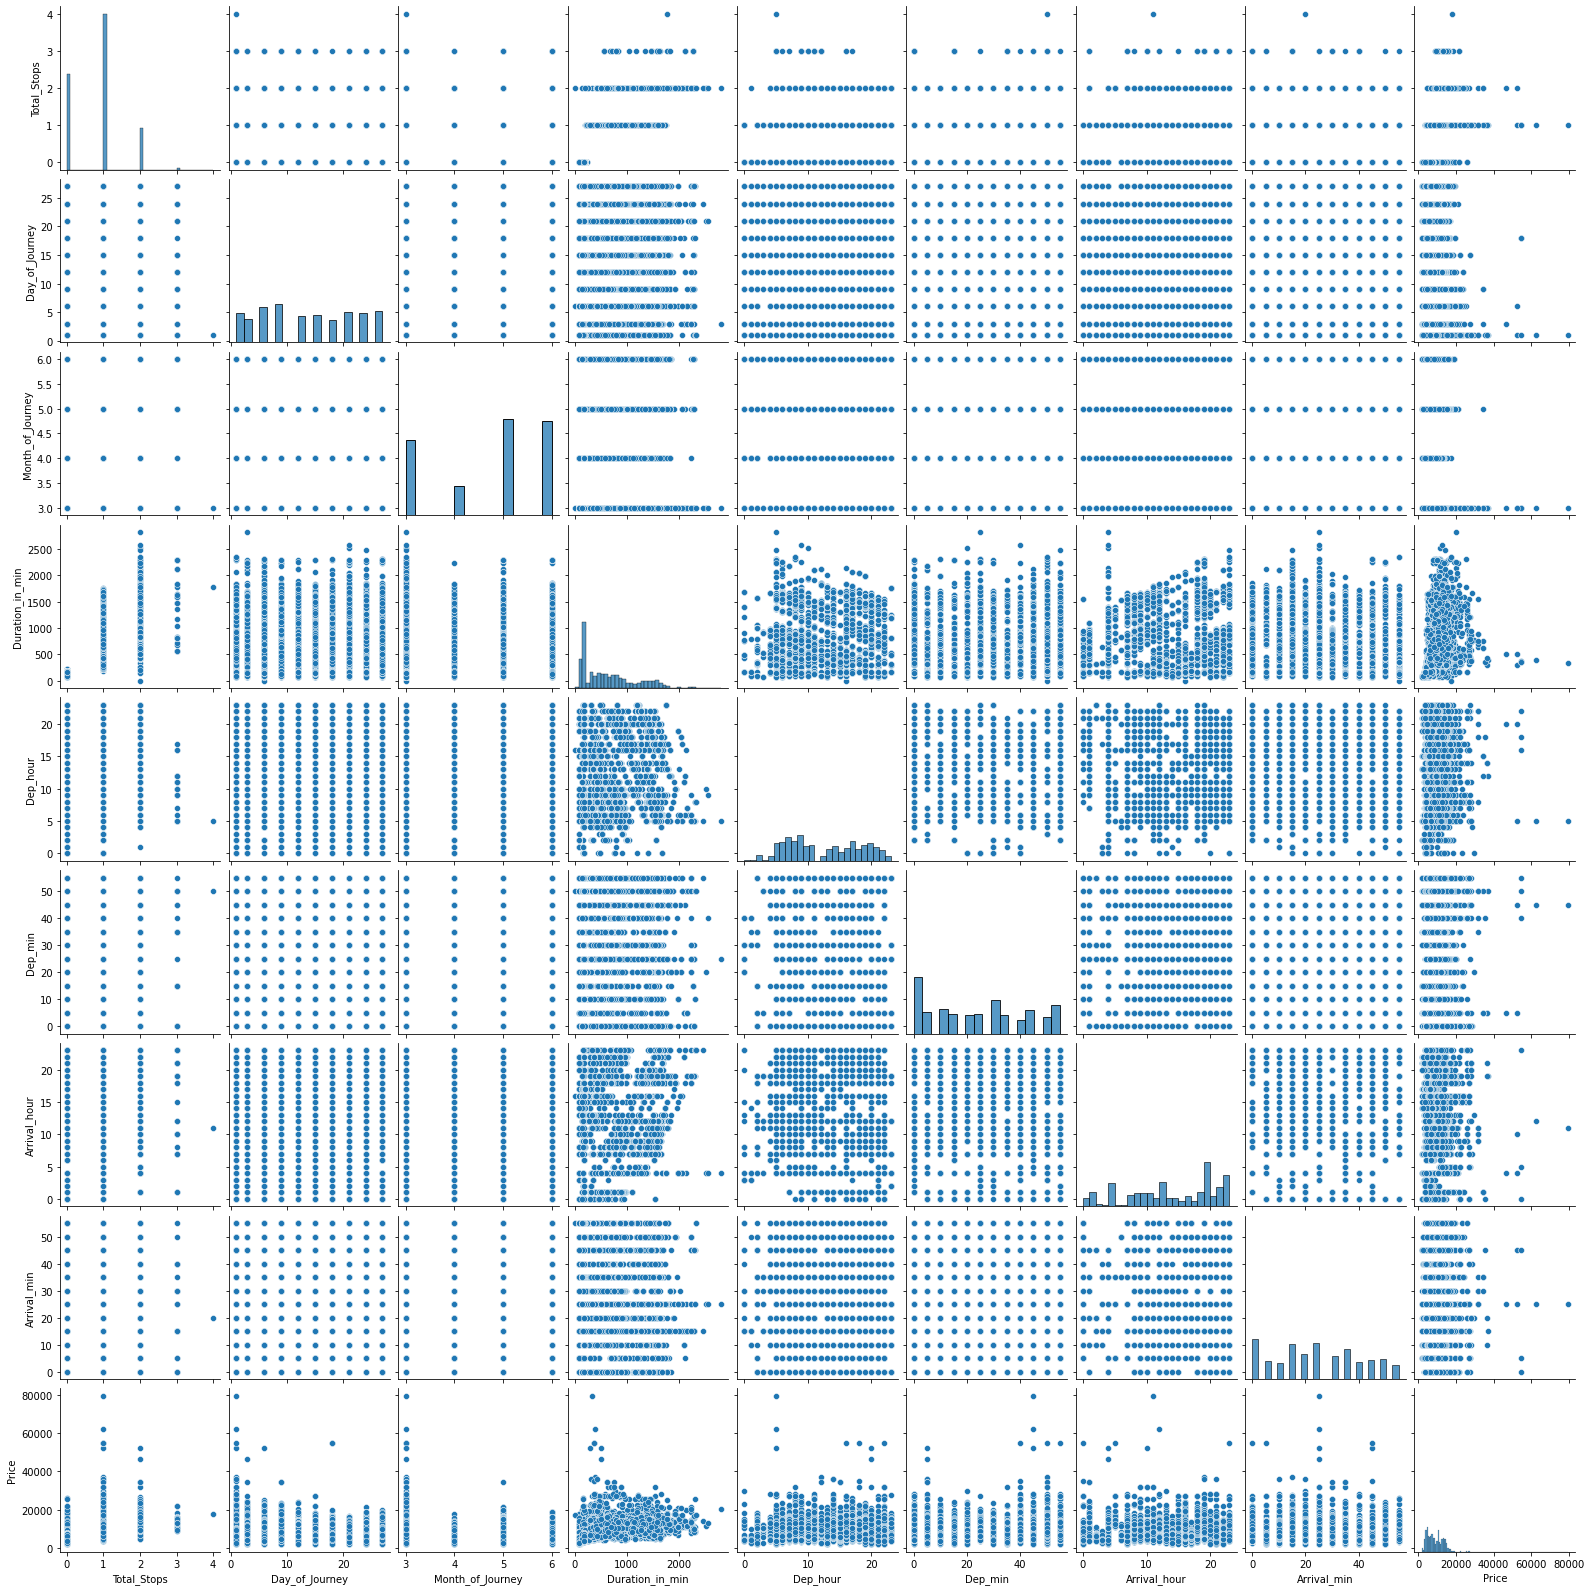

In [ ]:
plt.figure()
sns.pairplot(Air_data[["Total_Stops","Day_of_Journey", "Month_of_Journey","Duration_in_min","Dep_hour","Dep_min","Arrival_hour","Arrival_min","Price"]],
palette = "dark" , diag_kind = "hist")
plt.show()

#check data variation

<Figure size 432x288 with 0 Axes>

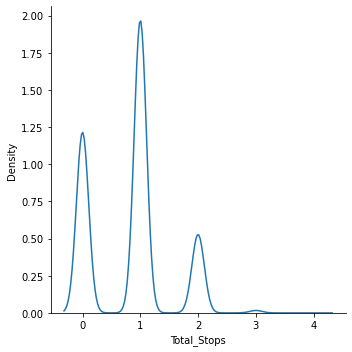

<Figure size 432x288 with 0 Axes>

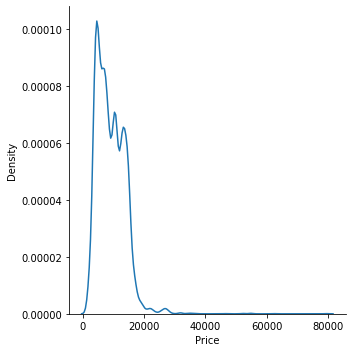

<Figure size 432x288 with 0 Axes>

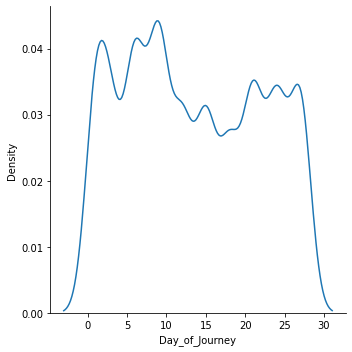

<Figure size 432x288 with 0 Axes>

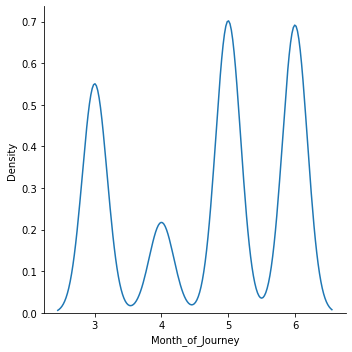

<Figure size 432x288 with 0 Axes>

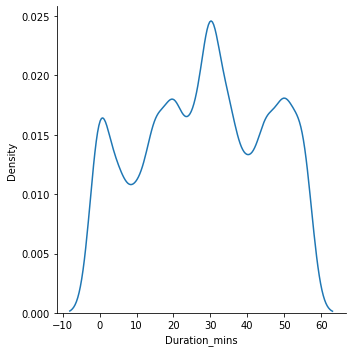

<Figure size 432x288 with 0 Axes>

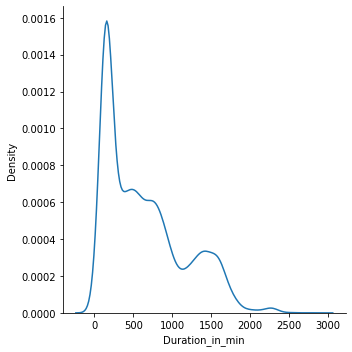

<Figure size 432x288 with 0 Axes>

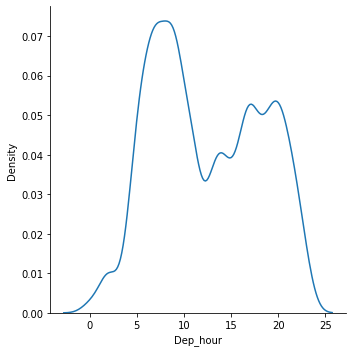

<Figure size 432x288 with 0 Axes>

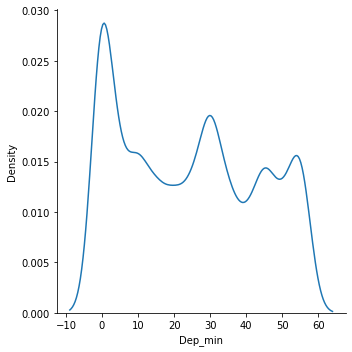

<Figure size 432x288 with 0 Axes>

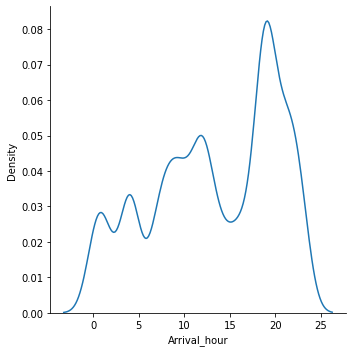

<Figure size 432x288 with 0 Axes>

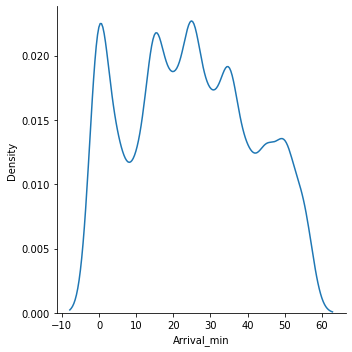

In [ ]:
cont_features = Air_data.columns[Air_data.dtypes != 'object']

def dist_plots(feature):
    plt.figure(figsize = (6,4))
    sns.displot(Air_data, x = feature, kind='kde')
    plt.show()
    
for feature in cont_features:
    dist_plots(feature)

**Data Transformation**

In [ ]:
data = Air_data.select_dtypes(include = 'object')

In [ ]:
data = pd.get_dummies(data , drop_first = 'True')

In [ ]:
data = pd.get_dummies(Air_data , drop_first = 'True')

In [ ]:
data.head(3)

,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Duration_mins,Duration_in_min,Dep_hour,Dep_min,Arrival_hour,Arrival_min,...,Route_DEL → TRV → COK,Route_DEL → UDR → BOM → COK,Route_MAA → CCU,Additional_Info_1 Short layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,3897,24,3,50,170,22,20,1,10,...,0,0,0,0,0,0,0,0,1,0
1,2,7662,1,5,25,445,5,50,13,15,...,0,0,0,0,0,0,0,0,1,0
2,2,13882,9,6,0,1140,9,25,4,25,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
data.columns

Index(['Total_Stops', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Duration_mins', 'Duration_in_min', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min',
       ...
       'Route_DEL → TRV → COK', 'Route_DEL → UDR → BOM → COK',
       'Route_MAA → CCU', 'Additional_Info_1 Short layover',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_No info', 'Additional_Info_Red-eye flight'],
      dtype='object', length=164)

**Data Splitting**

In [ ]:
X = data.drop(['Price','Duration_in_min'] , axis=1)
y = data[['Price']]

In [ ]:
X.head(3)

,Total_Stops,Day_of_Journey,Month_of_Journey,Duration_mins,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,...,Route_DEL → TRV → COK,Route_DEL → UDR → BOM → COK,Route_MAA → CCU,Additional_Info_1 Short layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,24,3,50,22,20,1,10,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,1,5,25,5,50,13,15,1,0,...,0,0,0,0,0,0,0,0,1,0
2,2,9,6,0,9,25,4,25,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
y.head(3)

,Price
0,3897
1,7662
2,13882


In [ ]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
X_train.shape

(7499, 162)

In [ ]:
y_train.shape

(7499, 1)

**Features Scaling**

In [ ]:
scaler_x = MinMaxScaler().fit(X_train)
scaler_y = MinMaxScaler().fit(y_train)

In [ ]:
X_train_sc = scaler_x.transform(X_train)
X_test_sc = scaler_x.transform(X_test)

In [ ]:
y_train_sc = scaler_y.transform(y_train)
y_test_sc = scaler_y.transform(y_test)

#Linear Regression

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train_sc , y_train_sc)
y_pred_sc = lr_model.predict(X_test_sc)

In [ ]:
import math

mae = mean_absolute_error(y_test_sc , y_pred_sc)
rmse = math.sqrt(mean_squared_error(y_test_sc , y_pred_sc))

print('MAE: ',mae)
print('RMSE: ',rmse)

MAE:  0.020264529161503498
RMSE:  0.03099552017125472


In [ ]:
print("R-squared: ", r2_score(y_test_sc, y_pred_sc)*100)

R-squared:  72.77163610416044


In [ ]:
y_test_inv = scaler_y.inverse_transform(y_test_sc.reshape(-1,1))
y_pred_inv = scaler_y.inverse_transform(y_pred_sc.reshape(-1,1))

actual_mae = mean_absolute_error(y_test_inv, y_pred_inv)
actual_rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

print('Actual MAE = ', int(actual_mae))
print('Actual RMSE = ', int(actual_rmse))
print("R-squared: ", r2_score(y_test_inv, y_pred_inv)*100)

Actual MAE =  1575
Actual RMSE =  2409
R-squared:  72.77163610416044


#Decision Tree

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train_sc, y_train_sc)
dt_y_pred_sc = dt.predict(X_test_sc)

In [ ]:
mae = mean_absolute_error(y_test_sc , dt_y_pred_sc)
rmse = math.sqrt(mean_squared_error(y_test_sc , dt_y_pred_sc))

print('MAE: ',mae)
print('RMSE: ',rmse)
print("R-squared: ", r2_score(y_test_sc, dt_y_pred_sc)*100)

MAE:  0.009536798151411096
RMSE:  0.02708936998465874
R-squared:  79.20200365959396


In [ ]:
y_test_inv = scaler_y.inverse_transform(y_test_sc.reshape(-1,1))
dt_y_pred_inv = scaler_y.inverse_transform(dt_y_pred_sc.reshape(-1,1))

actual_mae = mean_absolute_error(y_test_inv, dt_y_pred_inv)
actual_rmse = np.sqrt(mean_squared_error(y_test_inv, dt_y_pred_inv))

print('Actual MAE = ', int(actual_mae))
print('Actual RMSE = ', int(actual_rmse))
print("R-squared: ", r2_score(y_test_inv, dt_y_pred_inv)*100)

Actual MAE =  741
Actual RMSE =  2106
R-squared:  79.20200365959396


#Random Forest Regression

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train_sc , y_train_sc)
rf_y_pred_sc = rf.predict(X_test_sc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
mae = mean_absolute_error(y_test_sc , rf_y_pred_sc)
rmse = math.sqrt(mean_squared_error(y_test_sc , rf_y_pred_sc))

print('MAE: ',mae)
print('RMSE: ',rmse)
print("R-squared: ", r2_score(y_test_sc, rf_y_pred_sc)*100)

MAE:  0.00802118997944039
RMSE:  0.018334127111172653
R-squared:  90.47326326679432


In [ ]:
y_test_inv = scaler_y.inverse_transform(y_test_sc.reshape(-1,1))
rf_y_pred_inv = scaler_y.inverse_transform(rf_y_pred_sc.reshape(-1,1))

actual_mae = mean_absolute_error(y_test_inv, rf_y_pred_inv)
actual_rmse = np.sqrt(mean_squared_error(y_test_inv, rf_y_pred_inv))

print('Actual MAE = ', int(actual_mae))
print('Actual RMSE = ', int(actual_rmse))
print("R-squared: ", r2_score(y_test_inv, rf_y_pred_inv)*100)

Actual MAE =  623
Actual RMSE =  1425
R-squared:  90.47326326679432
